## Machine learning workflow example using Neural Network for Regression.
Dataset: Camparia  et al. , 2023, CET. 

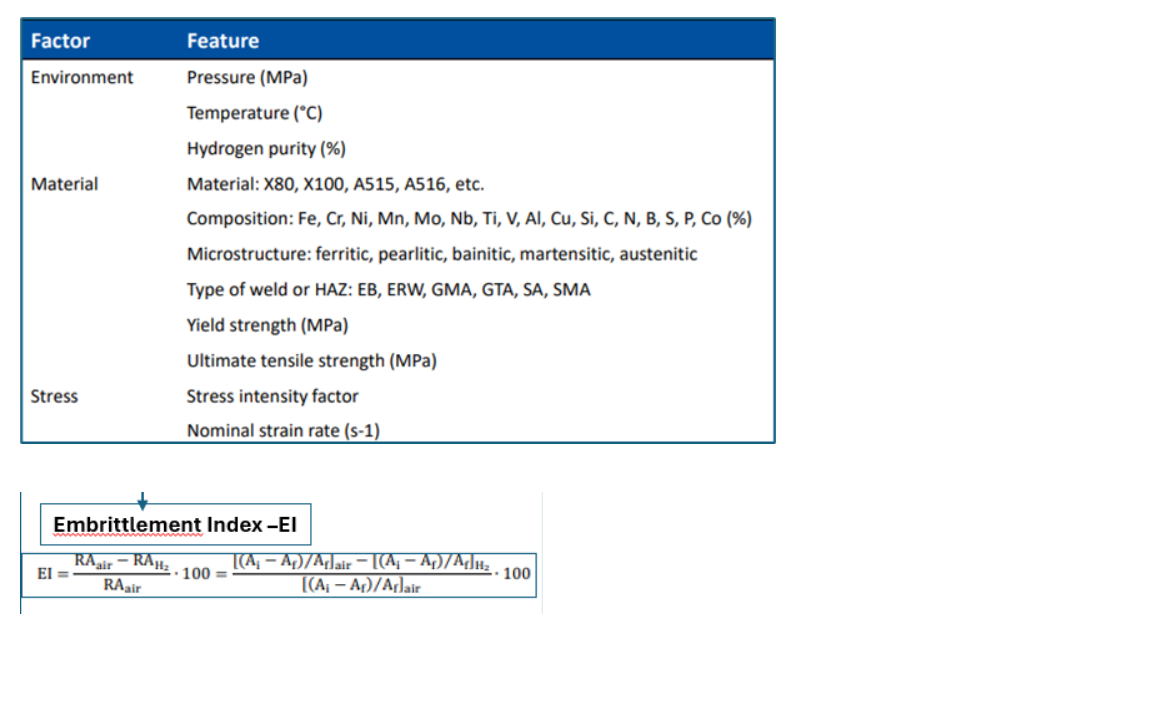

In [4]:
from IPython import display
display.Image("features.png")


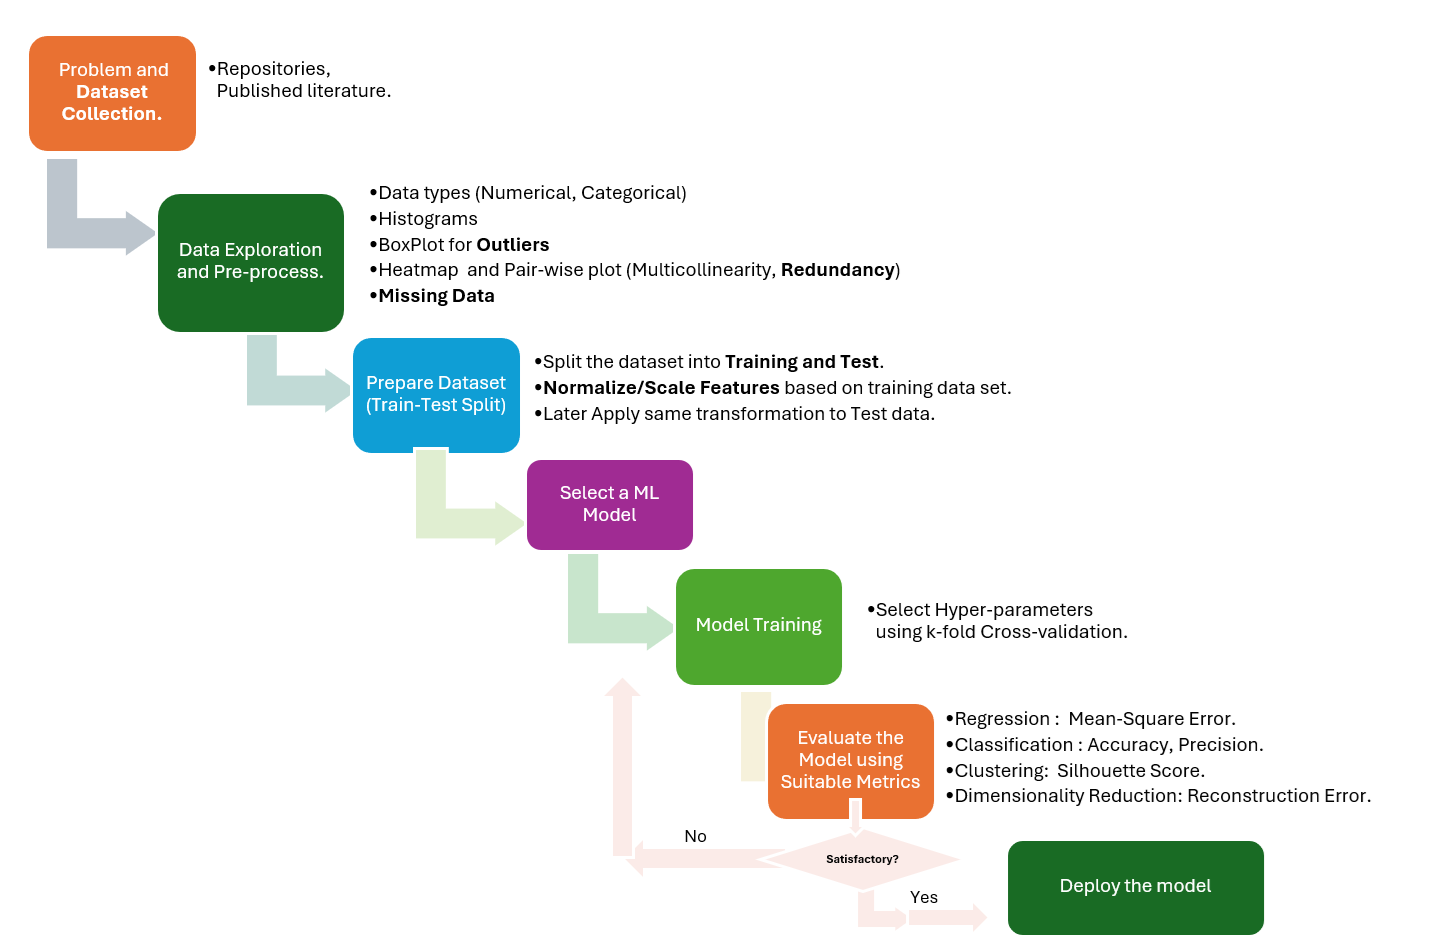

In [5]:
display.Image("workflow.png")

In [22]:
# In case of reloading functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%matplotlib inline

In [24]:
import os,sys
current_dir = os.getcwd()    # Get the current directory. 
sys.path.append(current_dir) # Append to path 

# To append new folder

#fn2=os.path.join(current_dir,'..','SourceCode')
#sys.path.append(fn2)         # Add the path to the folder containing imports.py

In [1]:
!pip install scikit-learn


     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.9 MB 13.4 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/12.9 MB 13.1 MB/s eta 0:00:01
   ---- ----------------------------------- 1.5/12.9 MB 12.0 MB/s eta 0:00:01
   ------ --------------------------------- 2.1/12.9 MB 12.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.8/12.9 MB 12.7 MB/s eta 0:00:01
   ---------- ----------------------------- 3.4/12.9 MB 12.9 MB/s eta 0:00:01
   ------------ --------------------------- 4.1/12.9 MB 13.1 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 13.1 MB/s eta 0:00:01
   ---------------- ----------------------- 5.4/12.9 MB 12.7 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.9 MB 12.9 MB/s eta 0:00:01
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.1 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score





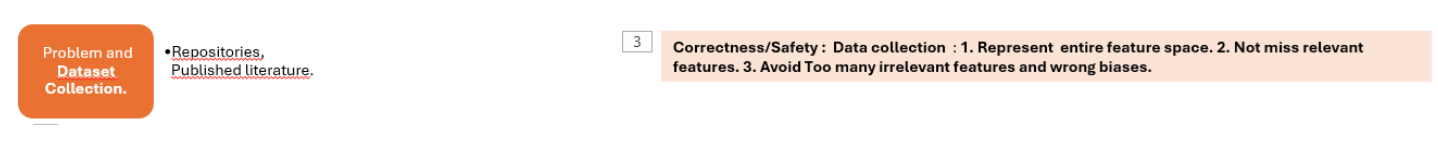

In [13]:
display.Image("dataset-collection.png")

In [26]:
#Load Dataset

filename="Database.xlsx"
data = pd.read_excel(filename)

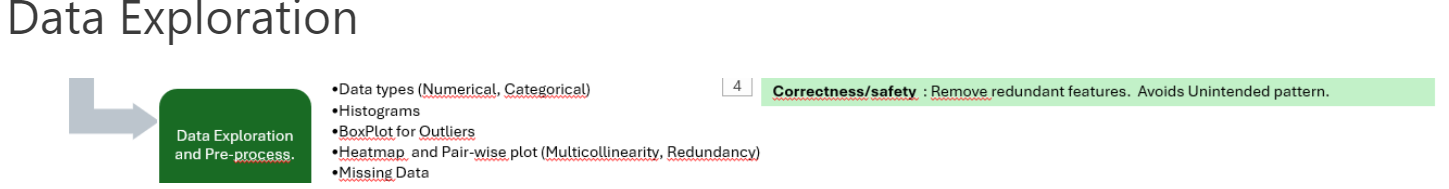

In [7]:
display.Image("data-exploration.png")

## 1. Basic Data Overview


### 1.1 Provides a concise summary of the DataFrame including data types and non-null values

In [27]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reference                        179 non-null    object 
 1   Material type                    179 non-null    object 
 2   Material                         177 non-null    object 
 3   Fe                               176 non-null    float64
 4   Cr                               174 non-null    float64
 5   Ni                               174 non-null    float64
 6   Mn                               174 non-null    float64
 7   Mo                               174 non-null    float64
 8   Nb                               174 non-null    float64
 9   Ti                               174 non-null    float64
 10  V                                174 non-null    float64
 11  Al                               174 non-null    float64
 12  Cu                    

### 1.2 Dimensions : Returns the number of rows and columns

In [28]:

nrows,ncolumns=data.shape
print(f'number of rows - samples : {nrows} \nnumber of columns - features : {ncolumns} .')

number of rows - samples : 179 
number of columns - features : 34 .


In [29]:
data.head(2)

,Reference,Material type,Material,Fe,Cr,Ni,Mn,Mo,Nb,Ti,...,Austenitic,Weld / Not weld,Yield strength [Mpa],Ultimate tensile strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1],Embrittlement Index,Severity class
0,[1],Steel,X80,97.417,0.0,0.0,1.86,0.0,0.05,0.0,...,0.0,-,555.0,625.0,22.0,0.1,1.0,0.00005,0.0,Small
1,[1],Steel,X80,97.417,0.0,0.0,1.86,0.0,0.05,0.0,...,0.0,-,555.0,625.0,22.0,5.0,1.0,0.00005,41.0,High


### 1.3 Descriptive statistics for both numerical and categorical data

In [30]:
data.columns

Index(['Reference', 'Material type', 'Material', 'Fe', 'Cr', 'Ni', 'Mn', 'Mo',
       'Nb', 'Ti', 'V', 'Al', 'Cu', 'Si', 'C', 'N', 'B', 'S', 'P', 'Co',
       'Ferritic', 'Bainitic', 'Pearlitic', 'Martensitic', 'Austenitic',
       'Weld / Not weld', 'Yield strength [Mpa]',
       'Ultimate tensile strength [Mpa]', 'Temperature [°C]', 'Pressure [MPa]',
       'Stress concentration factor', 'Strain rate [s-1]',
       'Embrittlement Index', 'Severity class'],
      dtype='object')

In [31]:

data.describe()

,Fe,Cr,Ni,Mn,Mo,Nb,Ti,V,Al,Cu,...,Pearlitic,Martensitic,Austenitic,Yield strength [Mpa],Ultimate tensile strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1],Embrittlement Index
count,176.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,1.760000e+02,176.000000
mean,80.723551,9.777839,5.648092,2.780075,0.403736,0.040172,0.132644,0.028586,0.020207,0.031437,...,0.011932,0.025000,0.493568,570.920455,851.414773,25.636364,54.865341,2.624432,5.371704e-03,33.895455
std,16.800760,9.168177,6.730716,2.923204,0.714533,0.153418,0.496764,0.101631,0.072731,0.081046,...,0.040704,0.149475,0.500686,274.804917,352.617824,74.413391,47.119823,2.791912,4.201115e-02,29.028415
min,49.934200,0.000000,0.000000,0.053000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,200.000000,414.000000,-162.000000,0.100000,1.000000,5.500000e-07,0.000000
25%,63.832000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,386.750000,625.000000,22.000000,6.900000,1.000000,3.000000e-04,2.977500
50%,80.023000,14.020000,6.200000,1.715000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,514.500000,776.000000,22.000000,69.000000,1.000000,4.000000e-04,32.265000
75%,97.778750,18.400000,9.687500,2.000000,0.415000,0.000000,0.000000,0.001500,0.000000,0.000000,...,0.000000,0.000000,1.000000,691.750000,958.000000,22.000000,69.000000,5.500000,6.700000e-04,58.157500
max,99.870000,23.000000,30.700000,9.300000,2.670000,0.830000,3.000000,0.780000,0.420000,0.420000,...,0.150000,1.000000,1.000000,1627.000000,2730.000000,677.000000,172.000000,8.400000,5.500000e-01,100.000000


### 1.4 Check Missing Values in rows

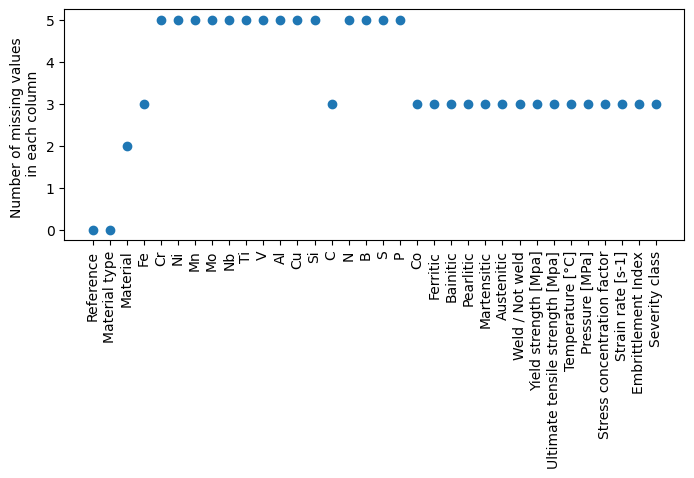

In [32]:
# Returns the number of missing values in each column
plt.figure(figsize=(8,3));
plt.plot(data.isnull().sum(),'o');
plt.ylabel("Number of missing values \n in each column");
#plt.xlabel("Column Names");
plt.xticks(rotation=90);

In [33]:
#Remove missing values and check shape
# Dropping rows with missing values
data.dropna(inplace=True)

# Dropping columns with missing values
#df.dropna(axis=1, inplace=True)

#Imputing missing values
# Filling missing values with the mean of the column
#df['numerical_column'].fillna(df['numerical_column'].mean(), inplace=True)

# Filling missing values with a specific value for categorical columns
#df['categorical_column'].fillna('Unknown', inplace=True)



In [34]:
data.shape

(174, 34)

### 1.5 BOX PLOT FOR OUTLIER DETECTION

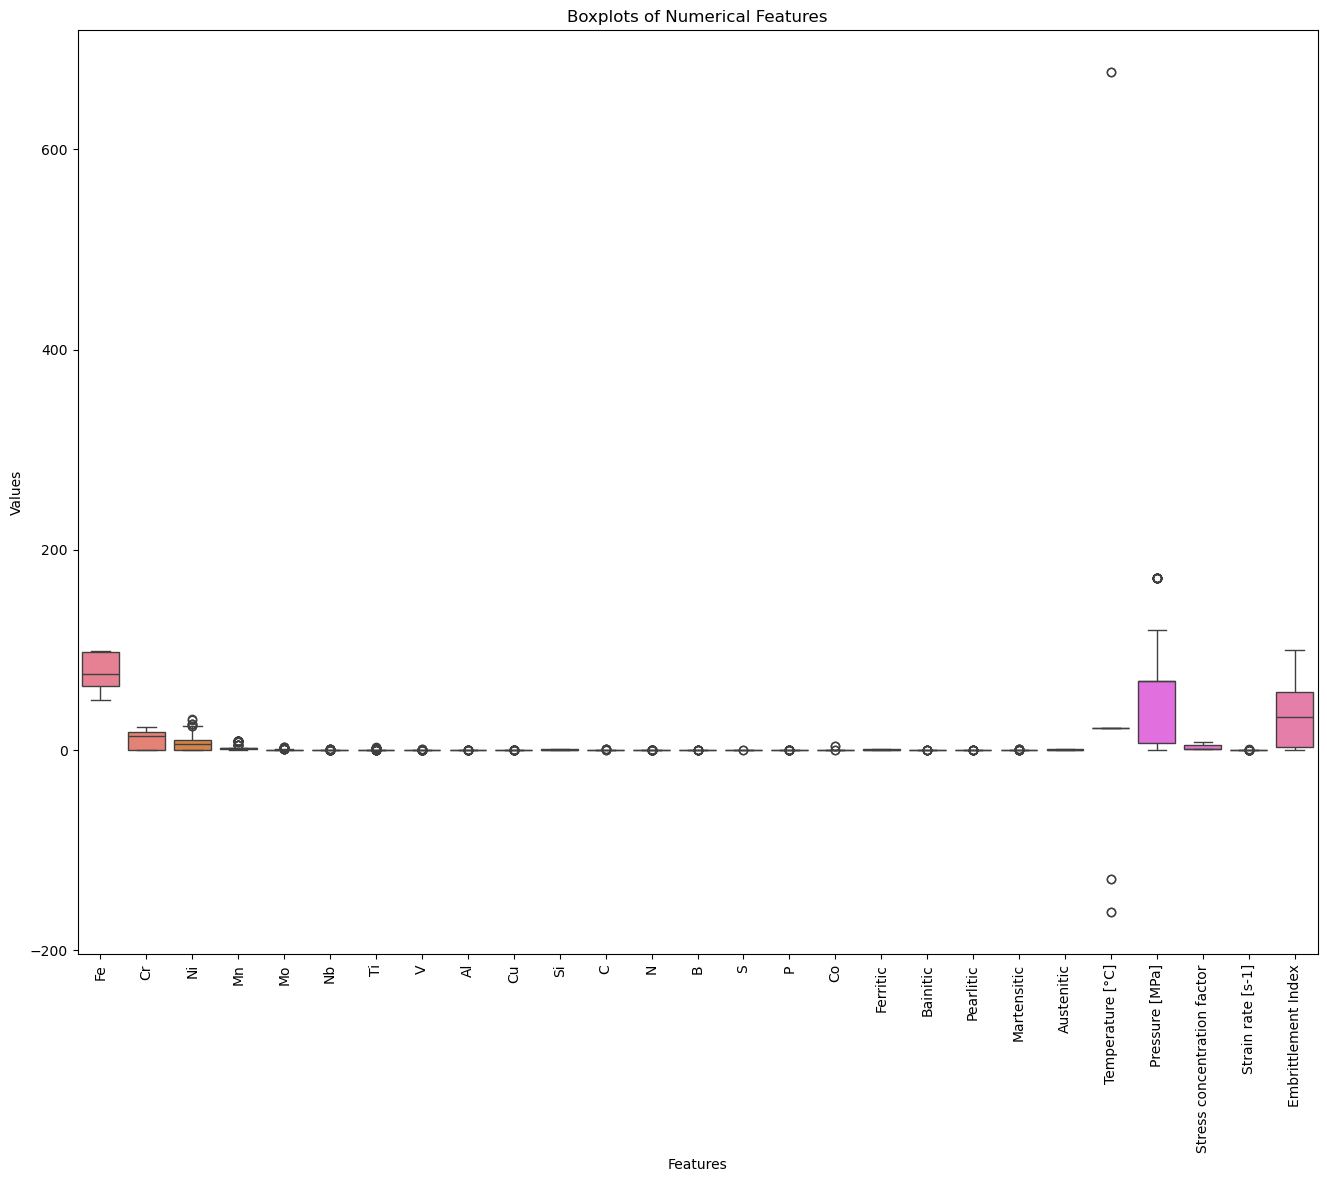

In [35]:
plt.figure(figsize=(16, 12))

numerical_df=data.select_dtypes(include=['float64', 'int64'])

sns.boxplot(data=numerical_df.loc[:, ~numerical_df.columns.isin(['Yield strength [Mpa]','Ultimate tensile strength [Mpa]'])])
plt.title('Boxplots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [36]:
# Returns the number of duplicate rows
data.duplicated().sum()

0

In [37]:
data.nunique()

Reference                            4
Material type                        1
Material                            33
Fe                                  59
Cr                                  43
Ni                                  44
Mn                                  50
Mo                                  27
Nb                                  11
Ti                                  11
V                                   14
Al                                  12
Cu                                  10
Si                                  39
C                                   38
N                                   13
B                                    7
S                                   30
P                                   26
Co                                   3
Ferritic                             6
Bainitic                             2
Pearlitic                            2
Martensitic                          3
Austenitic                           4
Weld / Not weld          

### 1.6 HEATMAP Correlation matrix for feature selection and redundant feature
- Feature selection - Target Variable: Features with a higher absolute correlation with the target (e.g., > 0.5) might be more valuable.
- Remove Reduandant: Look for Strong Correlations >0.85 between features + Assess importance to target + Multicollinearity and Remove one with high VIF.
- High VIF values indicate that a variable is highly correlated with other variables, which can distort the results of regression analysis. 


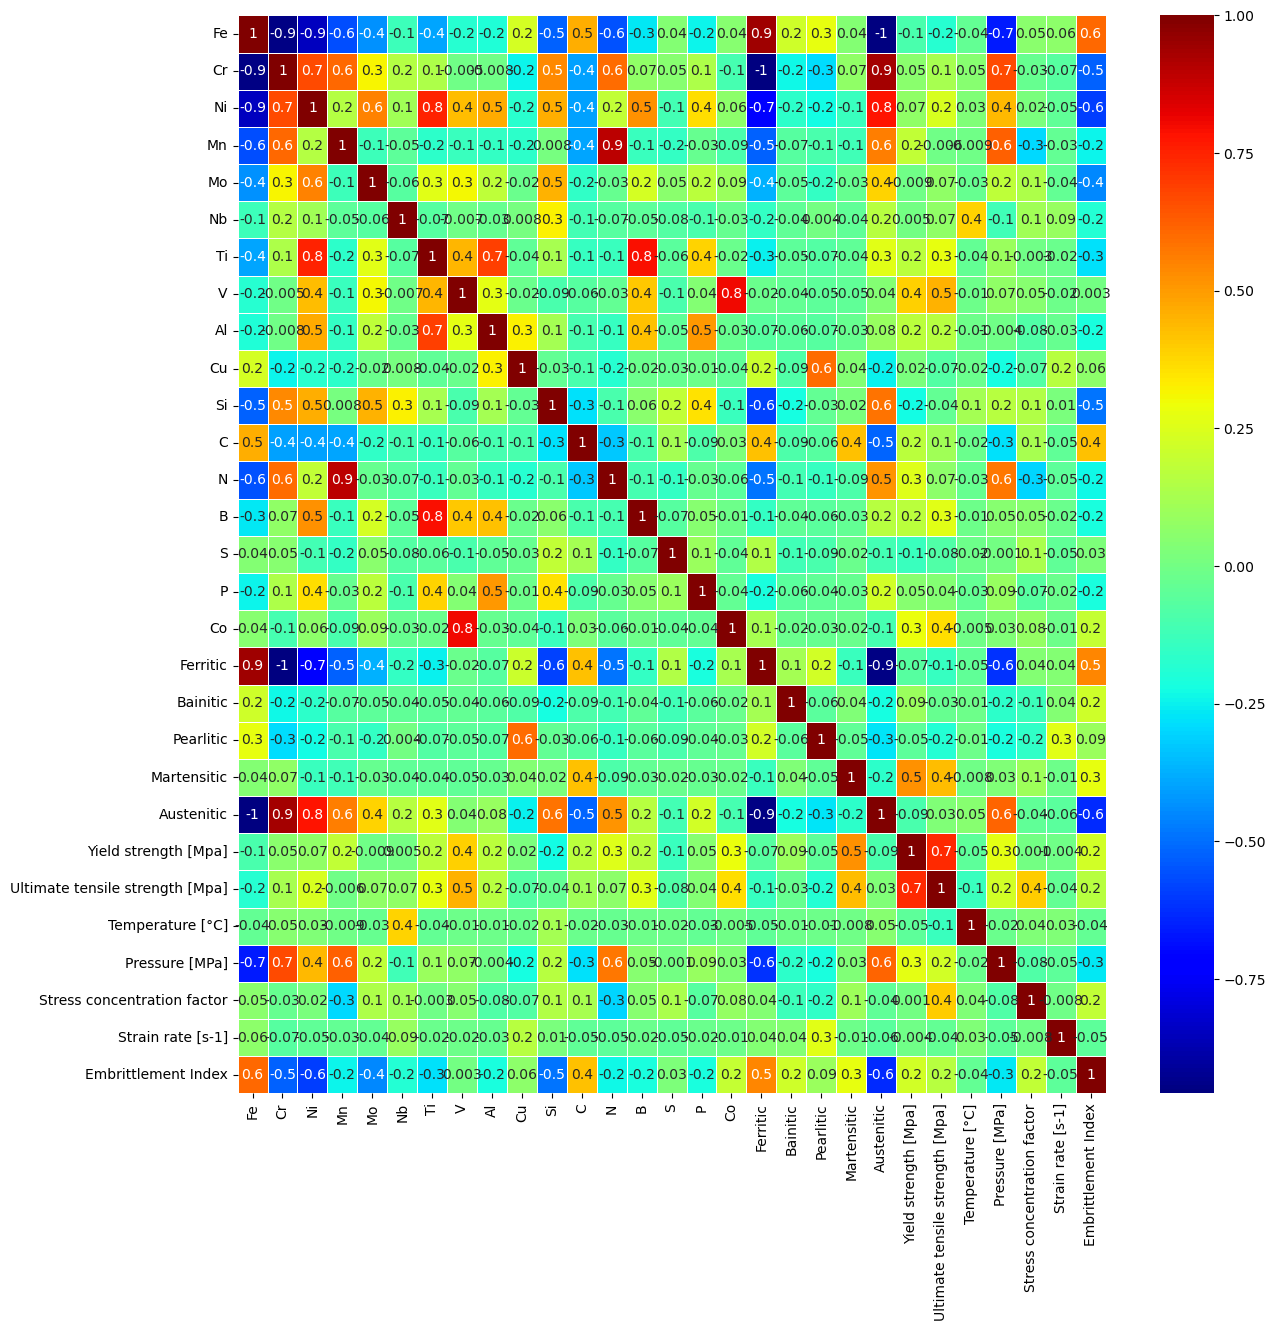

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(numerical_df.corr(), annot=True, cmap='jet', linewidths=0.5,fmt=".1g")
plt.show()

In [39]:
numerical_df.columns

Index(['Fe', 'Cr', 'Ni', 'Mn', 'Mo', 'Nb', 'Ti', 'V', 'Al', 'Cu', 'Si', 'C',
       'N', 'B', 'S', 'P', 'Co', 'Ferritic', 'Bainitic', 'Pearlitic',
       'Martensitic', 'Austenitic', 'Yield strength [Mpa]',
       'Ultimate tensile strength [Mpa]', 'Temperature [°C]', 'Pressure [MPa]',
       'Stress concentration factor', 'Strain rate [s-1]',
       'Embrittlement Index'],
      dtype='object')

In [40]:
# Pairplot to visualize relationships between numerical columns
sort_df=numerical_df[['Cr', 'Fe','Ferritic','Yield strength [Mpa]','Temperature [°C]', 'Pressure [MPa]','Stress concentration factor', 'Strain rate [s-1]']]
# sns.pairplot(sort_df) 
plt.show()


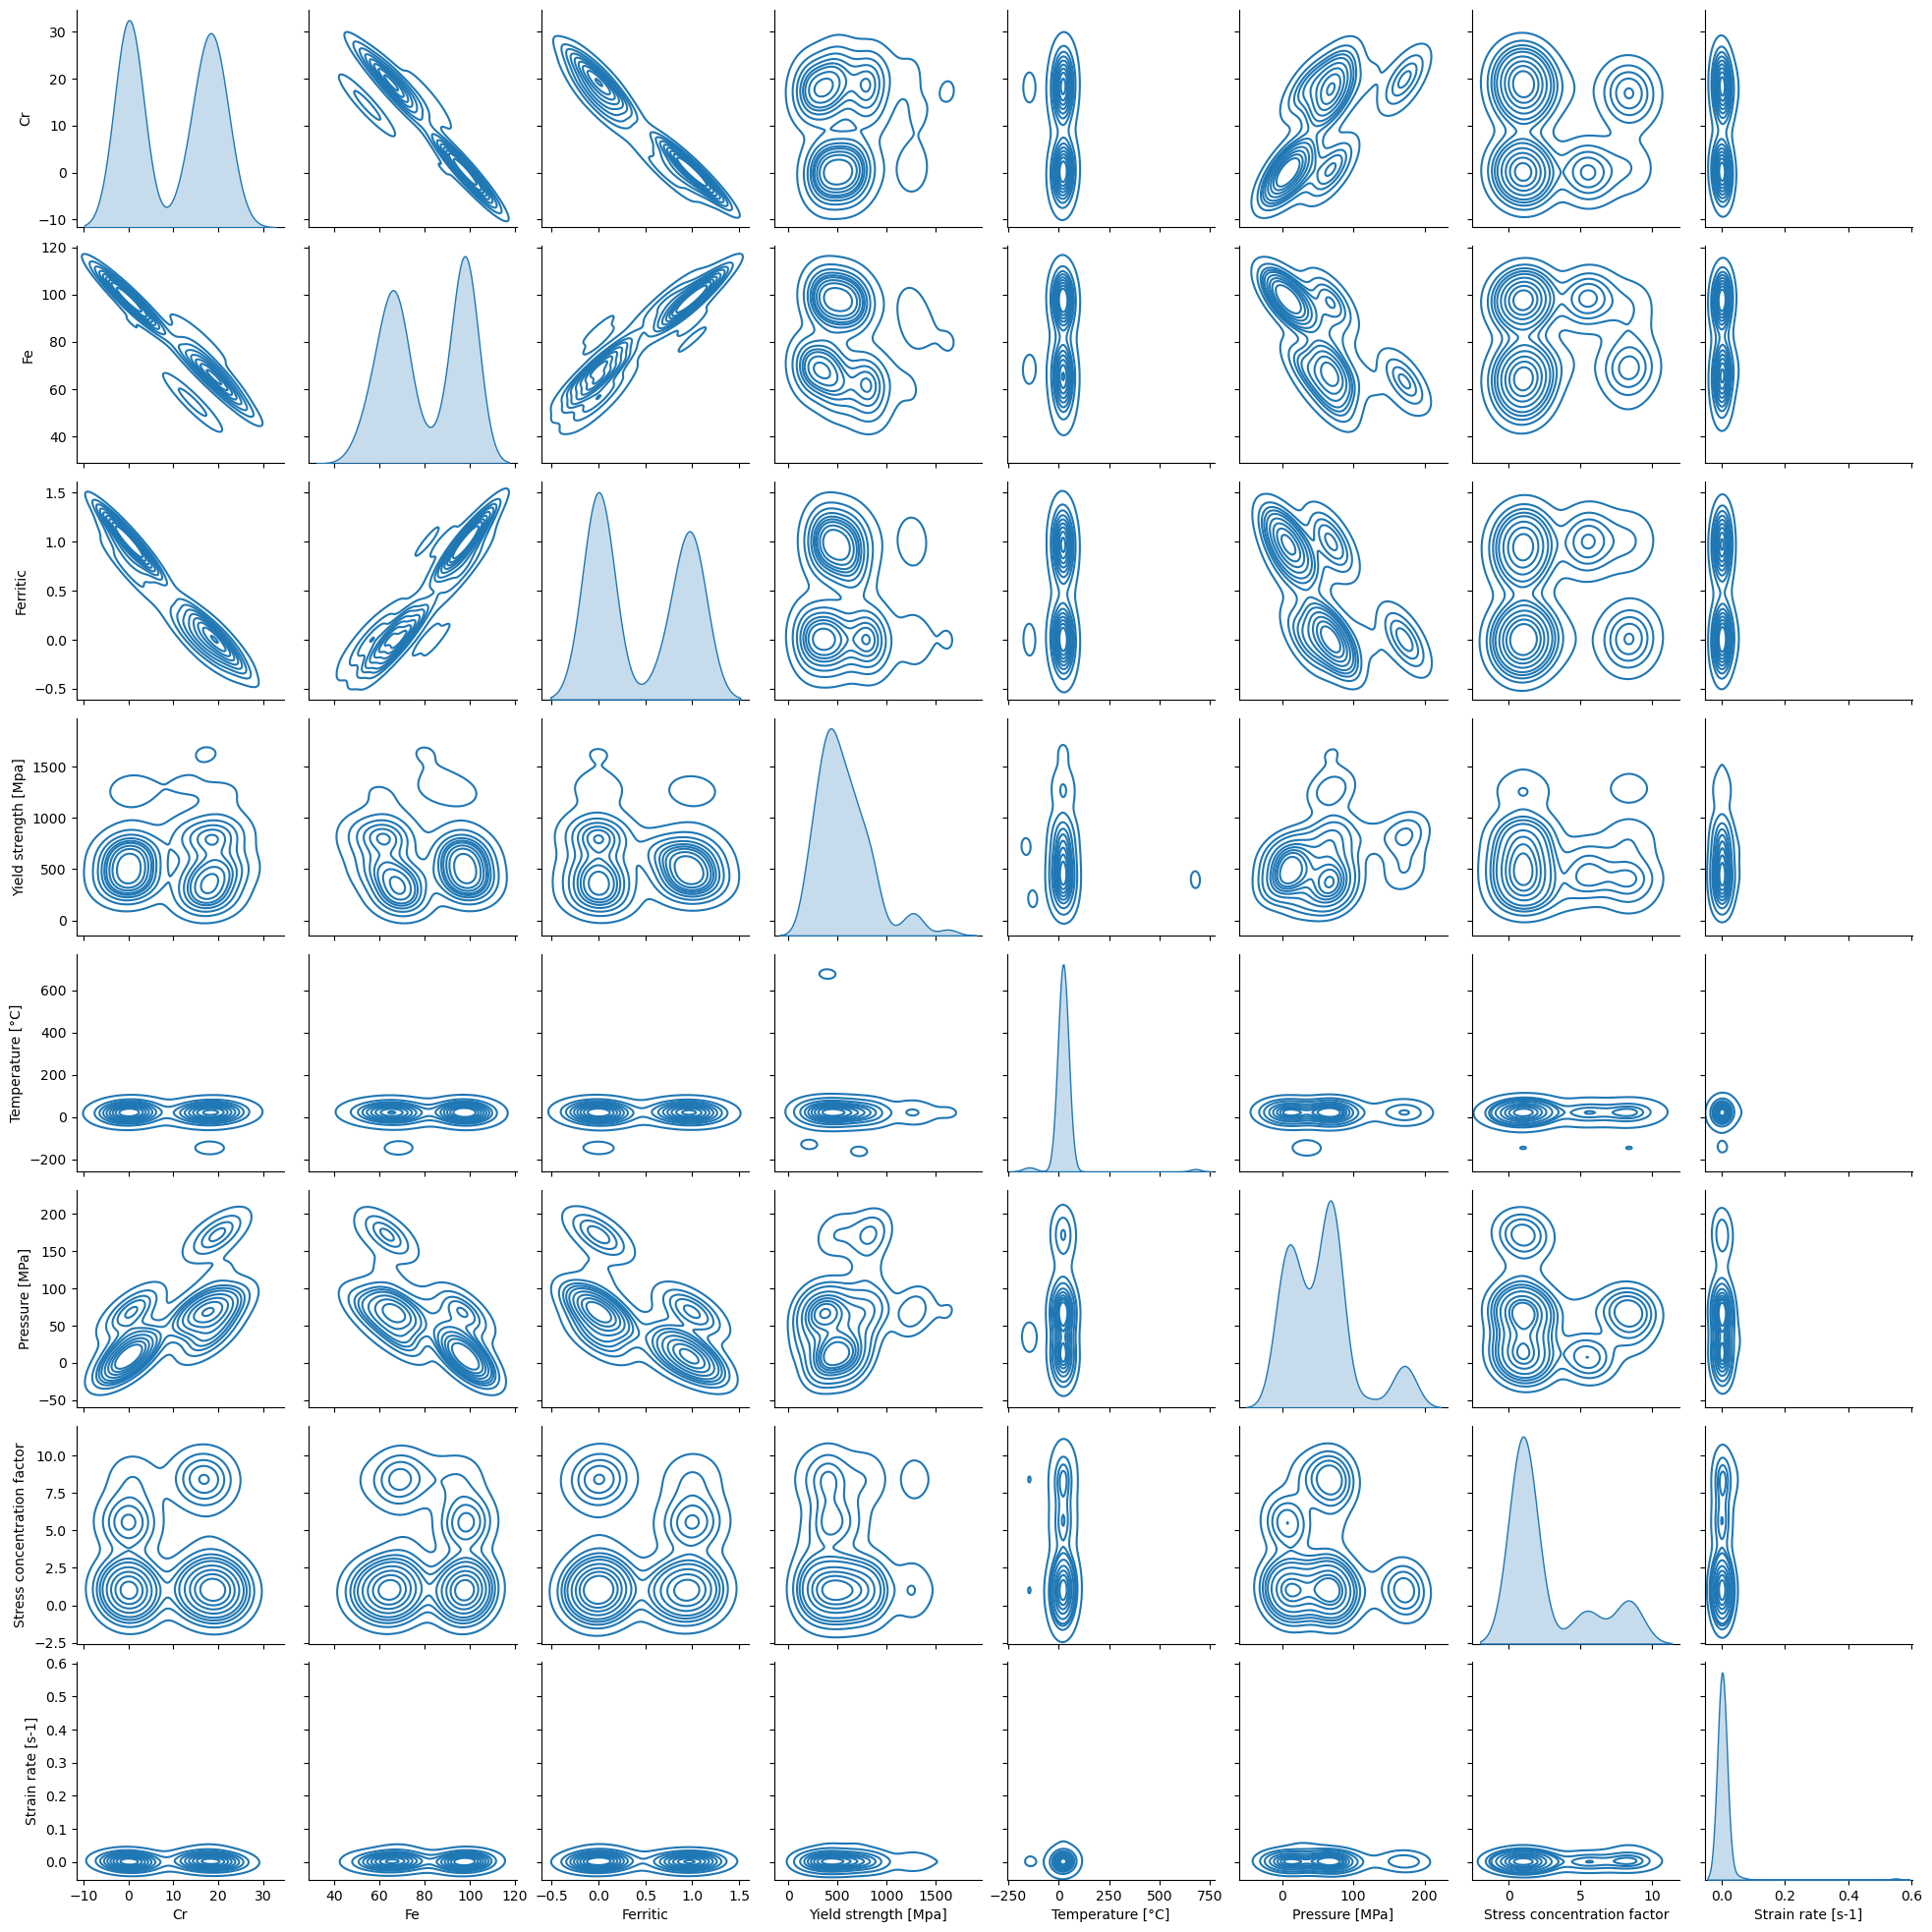

In [41]:
# Pairplot to visualize relationships between numerical columns
#sort_df=numerical_df[['Cr', 'Ferritic','Yield strength [Mpa]','Temperature [°C]', 'Pressure [MPa]','Stress concentration factor', 'Strain rate [s-1]']]
sns.pairplot(sort_df,kind="kde") 
plt.show()

In [42]:
# Select categorical columns (object or category)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Reference', 'Material type', 'Material', 'Weld / Not weld',
       'Severity class'],
      dtype='object')


In [43]:
data[categorical_columns].nunique()

Reference           4
Material type       1
Material           33
Weld / Not weld    12
Severity class      4
dtype: int64

In [44]:
data.tail(4)

,Reference,Material type,Material,Fe,Cr,Ni,Mn,Mo,Nb,Ti,...,Austenitic,Weld / Not weld,Yield strength [Mpa],Ultimate tensile strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1],Embrittlement Index,Severity class
172,[4],Steel,A-286,53.4735,15.07,25.58,1.470,1.35,0.0,1.93,...,1.0,-,848.0,1606.0,22.0,69.0,8.4,0.00070,0.00,Small
173,[4],Steel,A-286,57.1794,14.02,24.38,0.280,1.37,0.0,2.09,...,1.0,-,843.0,1826.0,22.0,69.0,8.4,0.00070,0.00,Small
174,[4],Steel,JBK-75,50.9690,14.48,30.46,0.110,1.22,0.0,2.07,...,1.0,-,875.0,1305.0,22.0,69.0,1.0,0.00033,1.00,Small
175,[4],Steel,JBK-75,49.9342,15.50,30.70,0.053,1.20,0.0,2.10,...,1.0,-,717.0,1131.0,22.0,172.0,1.0,0.02100,7.87,Small


###  One-Hot Encoding for categorical variables

In [45]:

df_one_hot = pd.get_dummies(data[['Material']], drop_first=True)

#print(df_one_hot)


In [46]:
numerical_df[['Ferritic']].drop_duplicates()

,Ferritic
0,0.850
10,0.700
22,1.000
85,0.000
102,0.047
103,0.085


In [47]:
select_numerical_df=numerical_df[['Cr','Ni', 'Mn', 'Mo',  'Ti', 'Al', 'Cu', 'Si', 'C', 'Ferritic', 'Bainitic', 'Pearlitic','Martensitic', 'Austenitic', 'Yield strength [Mpa]','Temperature [°C]','Pressure [MPa]','Stress concentration factor', 'Strain rate [s-1]']]

In [48]:
select_numerical_df.shape

(174, 19)

In [49]:
df_one_hot.shape

(174, 32)

In [50]:
selected_features=pd.concat((df_one_hot,select_numerical_df ),axis=1)
label=numerical_df['Embrittlement Index']


In [51]:
selected_features.shape

(174, 51)

In [52]:
selected_features.columns

Index(['Material_321', 'Material_347', 'Material_410', 'Material_1020',
       'Material_1042', 'Material_1080', 'Material_4140', 'Material_21-6-9',
       'Material_22-13-5', 'Material_304L', 'Material_440C', 'Material_A-286',
       'Material_A106', 'Material_A515', 'Material_A516', 'Material_A517',
       'Material_Annealed 22-13-5', 'Material_Annealed 304L',
       'Material_Annealed 316', 'Material_Annealed 430F', 'Material_HY-100',
       'Material_HY-80', 'Material_JBK-75', 'Material_Sensitized 316',
       'Material_W69', 'Material_X100', 'Material_X42', 'Material_X52',
       'Material_X60', 'Material_X65', 'Material_X70', 'Material_X80', 'Cr',
       'Ni', 'Mn', 'Mo', 'Ti', 'Al', 'Cu', 'Si', 'C', 'Ferritic', 'Bainitic',
       'Pearlitic', 'Martensitic', 'Austenitic', 'Yield strength [Mpa]',
       'Temperature [°C]', 'Pressure [MPa]', 'Stress concentration factor',
       'Strain rate [s-1]'],
      dtype='object')

In [53]:
selected_features.describe()

,Cr,Ni,Mn,Mo,Ti,Al,Cu,Si,C,Ferritic,Bainitic,Pearlitic,Martensitic,Austenitic,Yield strength [Mpa],Temperature [°C],Pressure [MPa],Stress concentration factor,Strain rate [s-1]
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,9.777839,5.648092,2.780075,0.403736,0.132644,0.020207,0.031437,0.397920,0.127862,0.453632,0.011494,0.010345,0.025287,0.499241,566.310345,25.678161,55.059770,2.643103,5.432873e-03
std,9.168177,6.730716,2.923204,0.714533,0.496764,0.072731,0.081046,0.301537,0.151085,0.479603,0.052510,0.038119,0.150312,0.500735,272.964641,74.841257,47.238269,2.802504,4.224937e-02
min,0.000000,0.000000,0.053000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,-162.000000,0.100000,1.000000,5.500000e-07
25%,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.202500,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,386.250000,22.000000,6.900000,1.000000,3.000000e-04
50%,14.020000,6.200000,1.715000,0.000000,0.000000,0.000000,0.000000,0.270000,0.075000,0.000000,0.000000,0.000000,0.000000,0.457500,511.500000,22.000000,69.000000,1.000000,4.000000e-04
75%,18.400000,9.687500,2.000000,0.415000,0.000000,0.000000,0.000000,0.580000,0.192500,1.000000,0.000000,0.000000,0.000000,1.000000,679.000000,22.000000,69.000000,5.500000,6.700000e-04
max,23.000000,30.700000,9.300000,2.670000,3.000000,0.420000,0.420000,1.000000,0.960000,1.000000,0.250000,0.150000,1.000000,1.000000,1627.000000,677.000000,172.000000,8.400000,5.500000e-01


In [54]:
import pandas as pd
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [sm.OLS(df[column], df.drop(column, axis=1)).fit().rsquared for column in df.columns]
    vif_data['VIF'] = 1 / (1 - vif_data['VIF'])
    return vif_data

# Calculate VIF
vif_result = calculate_vif(numerical_df)
print(vif_result)


                            feature       VIF
0                                Fe       inf
1                                Cr       inf
2                                Ni       inf
3                                Mn       inf
4                                Mo       inf
5                                Nb       inf
6                                Ti       inf
7                                 V       inf
8                                Al       inf
9                                Cu       inf
10                               Si       inf
11                                C       inf
12                                N       inf
13                                B       inf
14                                S       inf
15                                P       inf
16                               Co  8.371416
17                         Ferritic       inf
18                         Bainitic       inf
19                        Pearlitic       inf
20                      Martensiti

- Note - VIF Infinity for both X1 and X2 when as X1 + X2=1 or X1=2*X2. - remove one of them.  Alloy compositions are often constrained by a summation rule — for example, the total percentage of all elements must equal 100%. This creates perfect multicollinearity because the composition of one element is linearly dependent on the others.
- Remove one element: If the sum of all element compositions equals a constant, drop one element to eliminate perfect multicollinearity.
- Regularization: Use Ridge or Lasso regression to mitigate multicollinearity without dropping any variables.
- PCA: Reduce multicollinearity by transforming the data into uncorrelated principal components.

In [55]:
data.columns

Index(['Reference', 'Material type', 'Material', 'Fe', 'Cr', 'Ni', 'Mn', 'Mo',
       'Nb', 'Ti', 'V', 'Al', 'Cu', 'Si', 'C', 'N', 'B', 'S', 'P', 'Co',
       'Ferritic', 'Bainitic', 'Pearlitic', 'Martensitic', 'Austenitic',
       'Weld / Not weld', 'Yield strength [Mpa]',
       'Ultimate tensile strength [Mpa]', 'Temperature [°C]', 'Pressure [MPa]',
       'Stress concentration factor', 'Strain rate [s-1]',
       'Embrittlement Index', 'Severity class'],
      dtype='object')

In [56]:
# Use Selected_features and Label.

In [57]:
selected_features.shape

(174, 51)

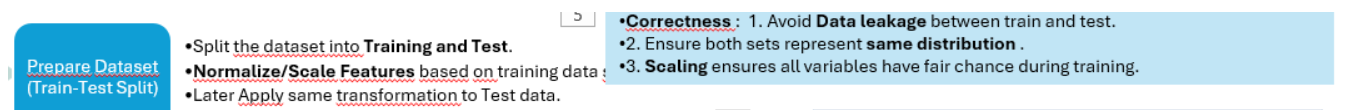

In [8]:
display.Image("train-test.png")

In [58]:



# 1. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(np.array(selected_features), np.array(label), test_size=0.2, random_state=42)

# 2. Scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to train and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data



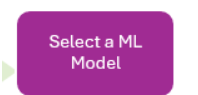

In [9]:
display.Image("selectmodel.png")

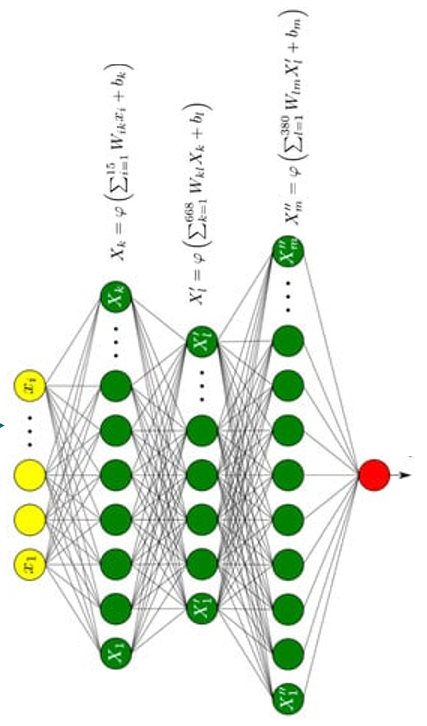

In [10]:
display.Image("ANN.png")

# Train the model 

c:\Users\mandart\A_MANDAR_DOCUMENTS\HAM_Wind_Energy\Demonstration\py310gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Error Vs Epochs')

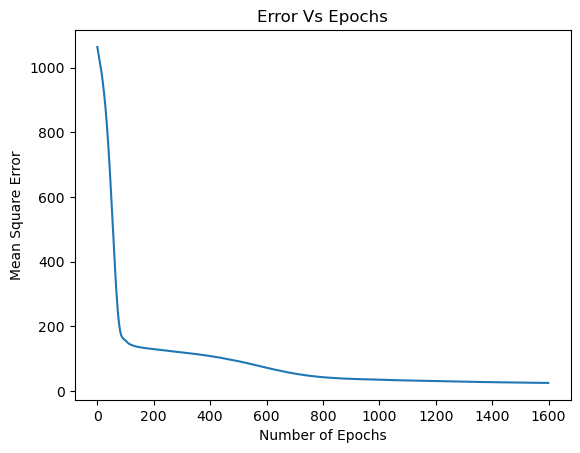

In [59]:
# 3. Initialize the neural network regressor (MLPRegressor)
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1600, random_state=42)

# 4. Fit the model on the scaled training data
mlp.fit(X_train_scaled, y_train)

plt.figure()
#pd.DataFrame(mlp.loss_curve_).plot()
plt.plot(mlp.loss_curve_)
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Square Error')
plt.title('Error Vs Epochs')



# Evaluation:  Test Generalizability of Model Evaluate the model

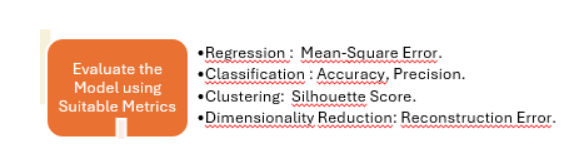

In [12]:
display.Image("evaluatemodel.png")

In [60]:
# 5. Predict on the test data
y_pred = mlp.predict(X_test_scaled)

ypred_train=mlp.predict(X_train_scaled)
mse_train = mean_squared_error(y_train,ypred_train)
r2_train = r2_score(y_train, ypred_train)

# 6. Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Unseen Test: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

print(f"Mean Squared Error on Train: {mse_train:.4f}")
print(f"R² train Score: {r2_train:.4f}")

Mean Squared Error on Unseen Test: 161452.8868
R² Score: -278.5398
Mean Squared Error on Train: 50.1350
R² train Score: 0.9442


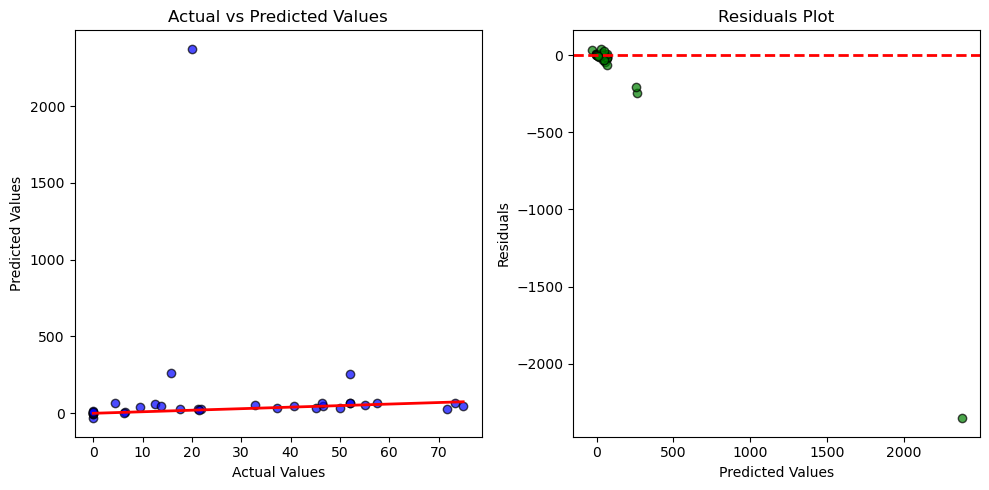

In [61]:
# 7. Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")

plt.tight_layout()
plt.show()

In [62]:
max_index = np.array(abs(residuals)).argmax()
print("Maximum Index position:",max_index) 

Maximum Index position: 15


In [63]:
print(selected_features.columns)
X_test[max_index]

Index(['Material_321', 'Material_347', 'Material_410', 'Material_1020',
       'Material_1042', 'Material_1080', 'Material_4140', 'Material_21-6-9',
       'Material_22-13-5', 'Material_304L', 'Material_440C', 'Material_A-286',
       'Material_A106', 'Material_A515', 'Material_A516', 'Material_A517',
       'Material_Annealed 22-13-5', 'Material_Annealed 304L',
       'Material_Annealed 316', 'Material_Annealed 430F', 'Material_HY-100',
       'Material_HY-80', 'Material_JBK-75', 'Material_Sensitized 316',
       'Material_W69', 'Material_X100', 'Material_X42', 'Material_X52',
       'Material_X60', 'Material_X65', 'Material_X70', 'Material_X80', 'Cr',
       'Ni', 'Mn', 'Mo', 'Ti', 'Al', 'Cu', 'Si', 'C', 'Ferritic', 'Bainitic',
       'Pearlitic', 'Martensitic', 'Austenitic', 'Yield strength [Mpa]',
       'Temperature [°C]', 'Pressure [MPa]', 'Stress concentration factor',
       'Strain rate [s-1]'],
      dtype='object')


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, True, 0.0, 0.0, 1.86, 0.0, 0.0, 0.0,
       0.22, 0.35, 0.075, 0.85, 0.0, 0.15, 0.0, 0.0, 555.0, 22.0, 30.0,
       1.0, 0.55], dtype=object)

# Thank you !!!
